In [1]:
from sklearn.model_selection import train_test_split, GridSearchCV, ParameterGrid
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, precision_score, recall_score, f1_score, roc_auc_score, RocCurveDisplay
from imblearn.over_sampling import SMOTE
from xgboost import XGBClassifier
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
import pickle
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer

In [2]:
traffic_stops_df = pd.read_csv('preprocessed_df.csv')

In [3]:
# Convert 'Was_a_Search_Conducted' to boolean
traffic_stops_df['Was_a_Search_Conducted'] = traffic_stops_df['Was_a_Search_Conducted'].apply(lambda x: True if x == 'YES' else False)

In [4]:
traffic_stops_df.head()

,ï»¿OBJECTID,Month_of_Stop,Reason_for_Stop,Officer_Race,Officer_Gender,Officer_Years_of_Service,Driver_Race,Driver_Ethnicity,Driver_Gender,Driver_Age,Was_a_Search_Conducted,Result_of_Stop,CMPD_Division,GlobalID
0,1,2019/11,Speeding,White,Male,12.0,Asian,Non-Hispanic,Female,39,False,Citation Issued,South Division,{A45CF4CD-282F-4030-A160-72773A3B4730}
1,2,2019/11,Speeding,White,Male,21.0,White,Non-Hispanic,Female,24,False,Citation Issued,Independence Division,{B03798C2-6FB5-4ED5-A15C-1BCBDA3C27D5}
2,3,2019/11,Speeding,Asian / Pacific Islander,Male,11.0,White,Non-Hispanic,Male,27,False,Citation Issued,Independence Division,{AB78EFFB-CB43-4488-B244-6E845DB18222}
3,4,2019/11,Speeding,White,Male,13.0,Black,Non-Hispanic,Female,20,False,Citation Issued,University City Division,{1BF01CA7-E08A-4C3A-8FDD-2EF1A1AEB2D0}
4,5,2019/11,Vehicle Regulatory,White,Male,22.0,White,Non-Hispanic,Female,33,False,Citation Issued,Independence Division,{7EEB79D4-2FF9-48F7-AC4B-4FC5F8A13EF8}


In [5]:
# Define categorical and numerical features
categorical_features = ['Reason_for_Stop', 'Officer_Gender', 'Driver_Race', 'Driver_Ethnicity', 'Driver_Gender', 'CMPD_Division']
numerical_features = ['Driver_Age']

In [6]:
# Initialize scaler

scaler = MinMaxScaler()

In [7]:
# Fit the scaler to the training data
scaler.fit(traffic_stops_df[numerical_features])

MinMaxScaler()

In [ ]:
# Save the fitted scaler to a file
with open('scaler1.pkl', 'wb') as f:
    pickle.dump(scaler, f)

In [8]:
traffic_stops_df.head()

,ï»¿OBJECTID,Month_of_Stop,Reason_for_Stop,Officer_Race,Officer_Gender,Officer_Years_of_Service,Driver_Race,Driver_Ethnicity,Driver_Gender,Driver_Age,Was_a_Search_Conducted,Result_of_Stop,CMPD_Division,GlobalID
0,1,2019/11,Speeding,White,Male,12.0,Asian,Non-Hispanic,Female,39,False,Citation Issued,South Division,{A45CF4CD-282F-4030-A160-72773A3B4730}
1,2,2019/11,Speeding,White,Male,21.0,White,Non-Hispanic,Female,24,False,Citation Issued,Independence Division,{B03798C2-6FB5-4ED5-A15C-1BCBDA3C27D5}
2,3,2019/11,Speeding,Asian / Pacific Islander,Male,11.0,White,Non-Hispanic,Male,27,False,Citation Issued,Independence Division,{AB78EFFB-CB43-4488-B244-6E845DB18222}
3,4,2019/11,Speeding,White,Male,13.0,Black,Non-Hispanic,Female,20,False,Citation Issued,University City Division,{1BF01CA7-E08A-4C3A-8FDD-2EF1A1AEB2D0}
4,5,2019/11,Vehicle Regulatory,White,Male,22.0,White,Non-Hispanic,Female,33,False,Citation Issued,Independence Division,{7EEB79D4-2FF9-48F7-AC4B-4FC5F8A13EF8}


In [9]:
# Prepare features and target for classification
X = traffic_stops_df[['Reason_for_Stop','Officer_Gender', 'Driver_Race', 'Driver_Ethnicity', 'Driver_Gender', 'Driver_Age', 'CMPD_Division']]
y = traffic_stops_df['Was_a_Search_Conducted'].astype(int)

In [10]:
# Encode categorical features into dummy variables
X = pd.get_dummies(X, columns=categorical_features, drop_first=True)

In [11]:
X.head()

,Driver_Age,Reason_for_Stop_Driving While Impaired,Reason_for_Stop_Investigation,Reason_for_Stop_Other,Reason_for_Stop_Safe Movement,Reason_for_Stop_SeatBelt,Reason_for_Stop_Speeding,Reason_for_Stop_Stop Light/Sign,Reason_for_Stop_Vehicle Equipment,Reason_for_Stop_Vehicle Regulatory,...,CMPD_Division_Hickory Grove Division,CMPD_Division_Independence Division,CMPD_Division_Metro Division,CMPD_Division_North Division,CMPD_Division_North Tryon Division,CMPD_Division_Providence Division,CMPD_Division_South Division,CMPD_Division_Steele Creek Division,CMPD_Division_University City Division,CMPD_Division_Westover Division
0,39,False,False,False,False,False,True,False,False,False,...,False,False,False,False,False,False,True,False,False,False
1,24,False,False,False,False,False,True,False,False,False,...,False,True,False,False,False,False,False,False,False,False
2,27,False,False,False,False,False,True,False,False,False,...,False,True,False,False,False,False,False,False,False,False
3,20,False,False,False,False,False,True,False,False,False,...,False,False,False,False,False,False,False,False,True,False
4,33,False,False,False,False,False,False,False,False,True,...,False,True,False,False,False,False,False,False,False,False


In [13]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [14]:
# Transform the numerical features in X_test using the same scaler
X_test[numerical_features] = scaler.transform(X_test[numerical_features])

In [15]:
X_train[numerical_features] = scaler.fit_transform(X_train[numerical_features])

<ipython-input-16-312f65a6cce0>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=y_train_balanced, palette='viridis')


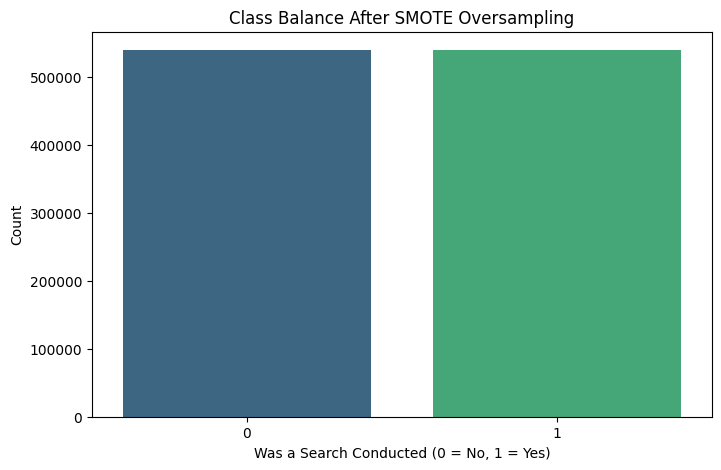

In [16]:
# Use SMOTE to oversample and balance the training set
smote = SMOTE(random_state=42)
X_train_balanced, y_train_balanced = smote.fit_resample(X_train, y_train)

# Plot class balance after oversampling
plt.figure(figsize=(8, 5))
sns.countplot(x=y_train_balanced, palette='viridis')
plt.title('Class Balance After SMOTE Oversampling')
plt.xlabel('Was a Search Conducted (0 = No, 1 = Yes)')
plt.ylabel('Count')
plt.show()

/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [05:51:45] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)



XGBoost Classification Report:

              precision    recall  f1-score   support

           0       0.98      0.78      0.87    231090
           1       0.13      0.66      0.22     11902

    accuracy                           0.77    242992
   macro avg       0.56      0.72      0.55    242992
weighted avg       0.94      0.77      0.84    242992


XGBoost Feature Importances:

                                   Feature  Importance
6                 Reason_for_Stop_Speeding    0.228762
1   Reason_for_Stop_Driving While Impaired    0.102864
21            CMPD_Division_Metro Division    0.085354
11                       Driver_Race_Black    0.079456
16                      Driver_Gender_Male    0.079235
2            Reason_for_Stop_Investigation    0.043414
0                               Driver_Age    0.039683
24       CMPD_Division_Providence Division    0.038938
23      CMPD_Division_North Tryon Division    0.030494
25            CMPD_Division_South Division    0.023783
28  

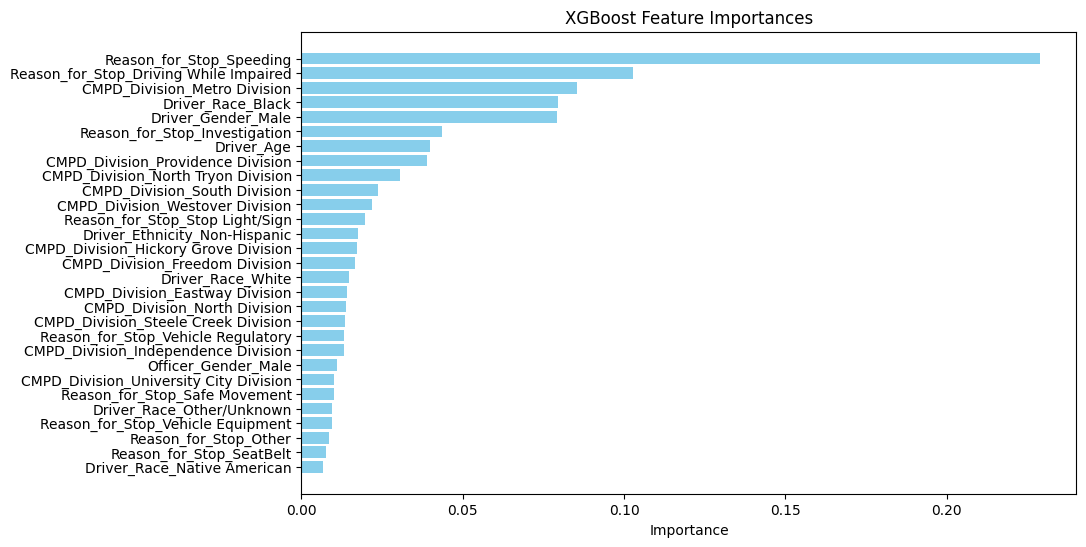

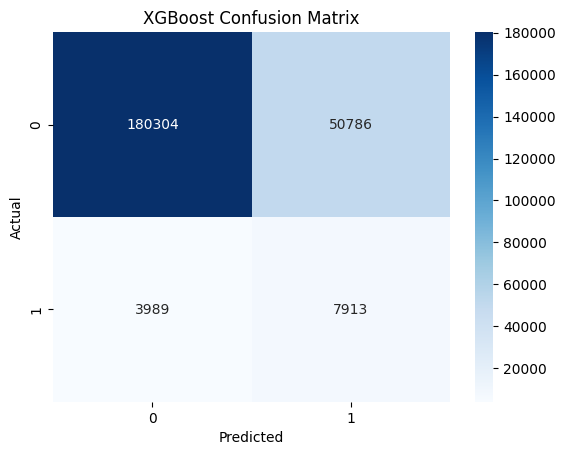


XGBoost AUC Score: 0.80


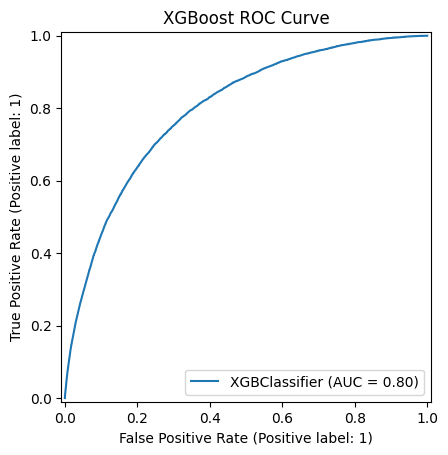

In [17]:
# Train the XGBoost Classifier with specified parameters
xgb_classifier = XGBClassifier(learning_rate=0.2, max_depth=10, n_estimators=150, subsample=0.8, tree_method='hist', use_label_encoder=False, eval_metric='auc', random_state=42)
xgb_classifier.fit(X_train_balanced, y_train_balanced)

# Make predictions
y_pred_xgb = xgb_classifier.predict(X_test)

# Evaluate the model
print("\nXGBoost Classification Report:\n")
print(classification_report(y_test, y_pred_xgb))

# Feature Importance
feature_importances_xgb = xgb_classifier.feature_importances_
features_xgb = X.columns
importance_df_xgb = pd.DataFrame({'Feature': features_xgb, 'Importance': feature_importances_xgb})
importance_df_xgb = importance_df_xgb.sort_values(by='Importance', ascending=False)
print("\nXGBoost Feature Importances:\n")
print(importance_df_xgb)

plt.figure(figsize=(10, 6))
plt.barh(importance_df_xgb['Feature'], importance_df_xgb['Importance'], color='skyblue')
plt.xlabel('Importance')
plt.title('XGBoost Feature Importances')
plt.gca().invert_yaxis()
plt.show()

# Confusion Matrix
conf_matrix_xgb = confusion_matrix(y_test, y_pred_xgb)
sns.heatmap(conf_matrix_xgb, annot=True, cmap='Blues', fmt='g')
plt.title('XGBoost Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

#AUC Score and ROC Curve
y_prob_xgb = xgb_classifier.predict_proba(X_test)[:, 1]
auc_score_xgb = roc_auc_score(y_test, y_prob_xgb)
print(f"\nXGBoost AUC Score: {auc_score_xgb:.2f}")

RocCurveDisplay.from_estimator(xgb_classifier, X_test, y_test)
plt.title('XGBoost ROC Curve')
plt.show()

In [18]:
# prompt: save model into pickle file

import pickle
# Assuming 'xgb_classifier' is your trained model
with open('search_modelx.pkl', 'wb') as file:
    pickle.dump(xgb_classifier, file)

In [20]:
# Save the model using booster.save_model
xgb_classifier.save_model('search_modelx.json')